# Adaline - Noise Pass Filter 

## Importing Libraries
- Numpy - for Mathematical Calculation
- Matplotlib - used for Plotting of Graphs

In [1]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib.patches as mpatches

## Generating Waves
Specify the frequency and duration of the wave to be generated.
The bitrate of the wave is set to 8000, which means that 8000 bits in terms of time represents 1 sec.

In [2]:
frequency = 50
fs = 8000/frequency
duration = 3   
num_samples = duration*8000

Text(0.5,1,'Plot of contaminated signal')

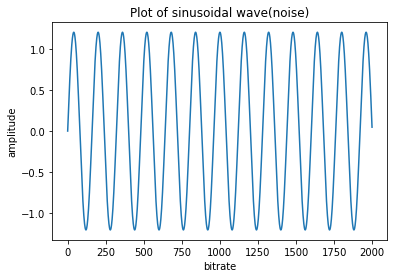

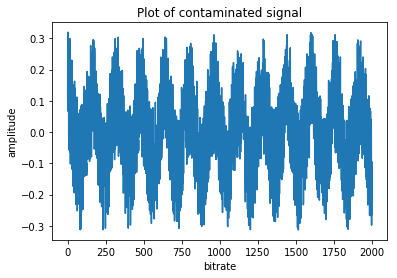

In [3]:
s = np.random.uniform(size=num_samples,low = -0.2, high = 0.2)
#S is the sampling of the random white noise
v =  1.2* np.sin(2*np.pi*np.arange(fs*duration*(8000/fs))*1/fs).astype(np.float32)
#V is the sinusoidal noise with amplitude 1.2 and frequency 50
m =  0.12* np.sin(np.pi/2+ 2*np.pi*np.arange(fs*duration*(8000/fs))*1/fs).astype(np.float32)
#m is the simulation of the wave passing through the noise filter
t = m+s
#t contains the original track with the wave from noise filter (m)
r = 16
#r is the no of the time steps/samples we wish to look back  to feed to our adaline network
f1 = plt.figure()
plt.plot(v[0:2000])
plt.xlabel('bitrate')
plt.ylabel('amplitude')
plt.title('Plot of sinusoidal wave(noise)')
f2 = plt.figure()
plt.plot(t[0:2000])
plt.xlabel('bitrate')
plt.ylabel('amplitude')
plt.title('Plot of contaminated signal')



In [4]:
"""
Preparing the data for the network
Since the input of the adaline exist with value from previous time steps,
the values for each sample is enlisted in the given forat
"""
data  = []
for  i in range(r-1,v.shape[0]):
    lister = []
    for i in range(r-1,-1,-1):
        lister.append(v[i])
    data.append(lister)
data = np.asarray(data)
target = np.asarray(m[r-1:])

In [5]:
input_mat=data
num_features=data.shape[1]
training_size=data.shape[0]


#The ADALINE weight update rule
def weight_update(weight_vec,err_val,input_vec,lr):
    wlen=len(weight_vec)-1
    change=2.0*lr*err_val
    for i in range(wlen):
        weight_vec[i]+=change*input_vec[i]
    weight_vec[-1]+=change
    return weight_vec

In [6]:
length=r
patterns=data.shape[1]
e_plot=[]
#The regenerated signal is stored in e_plot
error=[]
#Error/Deviation from the True Value
bias=1

In [7]:
def main():
    weight_vec=np.random.random_sample(r)         #initializing a random weight vector
    choices=np.arange(0.1,0.2,0.1)               #initializing choices for tuning the learning rate
    #The following code tries out various learning rates to find the best one.
    for k in range(len(choices)):
        weight_vec=np.random.random_sample(r)
        weight_vec = np.append(weight_vec,bias)
        lr=choices[k]

        for i in range(target.shape[0]): 
            true=target[i]
            pred = 0
            for j in range(r):
                pred+=(input_mat[i][j]*weight_vec[j])
            pred+=weight_vec[-1]
            err_val=true-pred  #computing error of the prediction
            error.append(np.abs(err_val))
            e_plot.append(t[r-1+i]-pred) #Storing the regenerated signal here 
            weight_vec=weight_update(weight_vec,err_val,input_mat[i],lr)  #updating the weight vector suitably
         
    return weight_vec          #returns the final updated weight vector
        
weight_vec=main()

# Reproducing 

Text(0.5,1,'Comparision of Restored Signal vs Original Signal in the first 35 iterations')

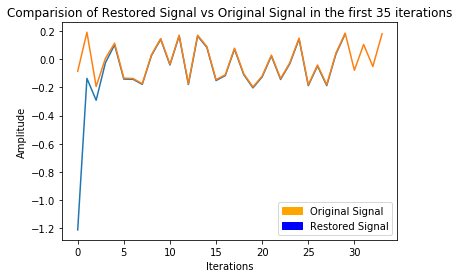

In [8]:
plt.plot(e_plot[1:50-r+1-4])
plt.plot(s[r-1+1:50])
plt.xlabel('Iterations')
plt.ylabel('Amplitude')
orange_patch = mpatches.Patch(color='orange', label='Original Signal')
blue_patch = mpatches.Patch(color='blue', label='Restored Signal')
plt.legend(handles=[orange_patch, blue_patch])

plt.title('Comparision of Restored Signal vs Original Signal in the first 35 iterations')

Text(0.5,1,'Error vs Iteration for the first 50 iterations')

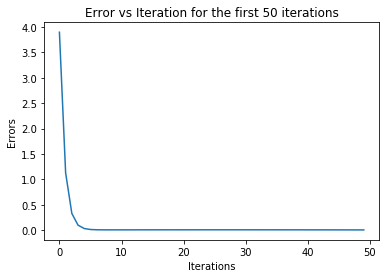

In [9]:
plt.plot(error[0:50])
plt.xlabel('Iterations')
plt.ylabel('Errors')
plt.title('Error vs Iteration for the first 50 iterations')

# References

1. Howard B. Demuth , Mark H. Beale , Orlando De Jess , Martin T. Hagan, Neural Network Design, Martin Hagan, 2014